In [64]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly.express as px

# Experiment Report: OCV Measurement and SOC Dependent Internal Resistance

## 1. Purpose of the Experiment

The primary purpose of this experiment is to analyze the Open Circuit Voltage (OCV) and internal resistance of a battery at various states of charge (SOC). The OCV is the voltage across the terminals of a fully relaxed battery when no current flows. The study aims to understand how the OCV varies with SOC and to determine the SOC-dependent internal resistance of the battery, which is crucial for optimizing battery performance and efficiency. The findings are expected to provide insights into battery health, efficiency, and performance under different operating conditions.

## 2. Background and Introduction

Open Circuit Voltage (OCV) is a critical parameter in battery testing, representing the voltage of a battery when no current is drawn. OCV measurements are fundamental for understanding the battery’s state of charge (SOC) and energy capacity. The internal resistance, another key parameter, influences how efficiently a battery can deliver energy and is a major factor in heat generation and voltage drop during operation.

For effective battery management and optimization, it's essential to determine these characteristics accurately. This experiment combines the OCV measurement with an internal resistance test, allowing a comprehensive analysis of the battery's performance at various SOC levels.

## 3. Experimental Procedure

### 3.1 Equipment and Materials

- Test battery (e.g., Lithium-ion)
- Battery cycler (capable of precise charge and discharge control)
- Voltage and current measurement devices with high resolution
- Temperature-controlled environment (if necessary)

### 3.2 Test Program

#### 3.2.1 OCV Measurement Procedure

1. **Initial Setup**: Fully charge the battery to 100% SOC. Ensure the battery is in a relaxed state with no current flowing.

2. **Stepwise Discharge**: Discharge the battery in steps to vary the SOC. For this experiment, SOC is varied by 10% per step.
   - Begin at 100% SOC and discharge the battery by 10% of its capacity.
   - Allow the battery to relax for a period (e.g., a few minutes) after each discharge step to reach a steady OCV.
   - Record the OCV after each relaxation period.

3. **Data Collection**: Continue the process until the battery reaches the cutoff voltage, representing 0% SOC.
   - Ensure the relaxation period after each step is long enough to minimize the effect of hysteresis on the OCV reading.

#### 3.2.2 Internal Resistance Measurement Procedure

1. **Resistance Measurement Setup**: After each relaxation phase (used for OCV measurement), apply a small current step (ΔI) to the battery.

2. **Voltage Response Recording**: Measure the immediate voltage drop (ΔU) across the battery terminals within a narrow time frame (e.g., 0.1 s, 1 s, or 5 s).

3. **Calculation of Internal Resistance**:
   $$
   R = \frac{\Delta U}{\Delta I} = \frac{U(t + \Delta t) - U(t)}{\Delta I}
   $$
   where $( U(t) $) is the voltage just before the current step, and $( U(t + \Delta t)$) is the voltage after the time interval $( \Delta t $).

4. **High Resolution Requirement**: Ensure high-resolution voltage and current measurement during this step to accurately capture the transient response.

#### 3.2.3 Maximum Discharge Current and Power Calculation

1. **Determine Maximum Discharge Current ($(I_{max}$))**:
   - Calculate using the formula:
   $$
   U_{min} = U_{OCV} - R \cdot I_{max}
   $$
   - Solve for $( I_{max} $).

2. **Calculate Maximum Discharge Power (\(P_{max}\))**:
   $$
   P_{max} = U_{min} \cdot I_{max} = \frac{U_{min} \cdot (U_{OCV} - U_{min})}{R}
   $$
   - Perform this calculation for each SOC level to analyze the SOC-dependent maximum discharge power.

## 4. Test Methods

1. **OCV Measurement**: Ensure the battery is in a fully relaxed state before each voltage reading to minimize hysteresis effects.
2. **Internal Resistance Measurement**: Use high-resolution equipment for capturing the voltage drop immediately after the current step is applied. Perform measurements at multiple SOC levels.
3. **Data Analysis**: Normalize all capacity measurements to a 100% scale to determine SOC. Compare discharge and charge curves to observe hysteresis effects.



# KOKAM SLPB 52495 Pouch Cell

## General Specifications

| Item | Specification | Remarks |
|---|---|---|
| 3.1 Nominal Capacity | 3.3 Ah | 0.5C/0.5C, 2.7V cut-off |
| 3.2 Nominal Voltage | 3.7 V | 2.7V - 4.2V |
| 3.3 Charging Method | CC/CV | Constant Current / Constant Voltage |
| 3.4 Charging Current (Std.) | 1.65 A | 0.5C, 0 - 45°C |
| 3.5 Charging Current (Max.) | 6.6 A | 2C |
| 3.6 Charging End Condition | 165 mA | ±0.03V |
| 3.7 Charging Voltage | 4.2 V | |
| 3.8 Charging Time (Std.) | 5 hours | CC + CV mode |
| 3.9 Discharging Current (Std.) | 1.65 A | 0.5C, 20 - 60°C |
| 3.10 Discharging Current (Max.) | 6.6 A | 2C |
| 3.11 Pulse Discharging (Max.) | 9.9 A | 3C, Less than 10 sec. |
| 3.12 Discharge Cut-off Voltage | 3 V | |
| 3.13 Cycle (Min. Capacity) | 2.64 Ah | 1C/1C, 1000cycle@25°C |
| 3.14 Cell Weight | 64.0 g | For bare one cell |
| 3.15 Storage Temperature Range | -20 - 60°C | For up to one month |
| | -20 - 40°C | For up to three months |
| | -20 - 25°C | For up to one year |

In [65]:
df = pd.read_excel('/content/sample_data/Kokam_OCV.xlsx')
df.head()

,Time[h],DataSet,t-Step[h],time(sec),Command,U[V],I[A],Ah[Ah]
0,1.593852,199,1.666667e-01,599.999999,Pause,4.181487,0.000000,1.652556
1,1.593945,200,0.000000e+00,0.000000,Discharge,4.181106,-0.001076,1.652556
2,1.593945,201,2.777359e-07,0.001000,Discharge,4.104052,-1.603081,1.652556
3,1.593946,202,1.110943e-06,0.003999,Discharge,4.094134,-1.646679,1.652555
4,1.593961,203,1.610868e-05,0.057991,Discharge,4.084216,-1.649227,1.652530


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time[h]    1272 non-null   float64
 1   DataSet    1272 non-null   int64  
 2   t-Step[h]  1272 non-null   float64
 3   time(sec)  1272 non-null   float64
 4   Command    1272 non-null   object 
 5   U[V]       1272 non-null   float64
 6   I[A]       1272 non-null   float64
 7   Ah[Ah]     1272 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 79.6+ KB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time[h],1272.0,3.769757,1.318345,1.593852,2.694504,3.795230,4.895731,6.420798
DataSet,1272.0,834.500000,367.339080,199.000000,516.750000,834.500000,1152.250000,1470.000000
t-Step[h],1272.0,0.088369,0.175217,0.000000,0.000604,0.001389,0.116667,1.000002
time(sec),1272.0,318.126725,630.782295,0.000000,2.175000,5.000001,419.999999,3600.006595
U[V],1272.0,3.631486,0.317078,2.699161,3.477325,3.683500,3.863021,4.181487
I[A],1272.0,-0.942917,1.123670,-1.731363,-1.649998,-1.649980,0.000000,1.683459
Ah[Ah],1272.0,-0.192889,1.023020,-1.634640,-1.006609,-0.327466,0.662236,1.652556


In [68]:
df["Command"].value_counts()

,count
Command,
Discharge,877
Pause,255
Charge,140


In [69]:
df.drop(columns=['time(sec)'], inplace=True)

In [70]:

df['Time(s)'] = (df['t-Step[h]'] * 3600).round(2)
df.drop(columns=['t-Step[h]'], inplace=True)
df.head()

,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s)
0,1.593852,199,Pause,4.181487,0.000000,1.652556,600.00
1,1.593945,200,Discharge,4.181106,-0.001076,1.652556,0.00
2,1.593945,201,Discharge,4.104052,-1.603081,1.652556,0.00
3,1.593946,202,Discharge,4.094134,-1.646679,1.652555,0.00
4,1.593961,203,Discharge,4.084216,-1.649227,1.652530,0.06


In [71]:
df.head()

,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s)
0,1.593852,199,Pause,4.181487,0.000000,1.652556,600.00
1,1.593945,200,Discharge,4.181106,-0.001076,1.652556,0.00
2,1.593945,201,Discharge,4.104052,-1.603081,1.652556,0.00
3,1.593946,202,Discharge,4.094134,-1.646679,1.652555,0.00
4,1.593961,203,Discharge,4.084216,-1.649227,1.652530,0.06


In [72]:
def process_battery_data(df):
    """
    Process battery data to calculate SOC, Power, and Resistance.

    Parameters:
    df (pd.DataFrame): DataFrame containing battery data with columns 'Ah[Ah]', 'I[A]', 'U[V]'.

    Returns:
    pd.DataFrame: Updated DataFrame with 'SOC', 'Power', 'Resistance', and 'capacity_range' columns.
    """
    required_columns = {'Ah[Ah]', 'I[A]', 'U[V]'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

    # Calculate capacity range
    min_capacity = df["Ah[Ah]"].min()
    max_capacity = df["Ah[Ah]"].max()
    df['capacity_range'] = df['Ah[Ah]'] - min_capacity

    # Calculate State of Charge (SOC)
    df['SOC'] = (df['capacity_range'] / df['capacity_range'].max()) * 100

    # Calculate Power
    df['Power'] = df.apply(lambda row: -row['I[A]'] * row['U[V]'] if row['I[A]'] < 0 else row['I[A]'] * row['U[V]'], axis=1) # Use apply to calculate power for each row based on the condition

    # Calculate Resistance, handling division by zero
    df['Resistance'] = df.apply(lambda row: -row['U[V]'] / row['I[A]'] if row['I[A]'] < 0 else (float('inf') if row['I[A]'] == 0 else row['U[V]'] / row['I[A]']), axis=1) # Use apply to calculate resistance for each row based on the conditions

    # Rounding values
    df['SOC'] = df['SOC'].round(2)
    df['Power'] = df['Power'].round(2)
    df['Resistance'] = df['Resistance'].round(2)
    return df

# Example usage:
# df = pd.read_excel('your_data_file.xlsx')  # Load your DataFrame from a file
df_processed = process_battery_data(df)  # Process the DataFrame
df_processed.head()  # Display the first few rows of the processed DataFrame

,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
0,1.593852,199,Pause,4.181487,0.000000,1.652556,600.00,3.287196,100.0,0.00,inf
1,1.593945,200,Discharge,4.181106,-0.001076,1.652556,0.00,3.287196,100.0,0.00,3884.02
2,1.593945,201,Discharge,4.104052,-1.603081,1.652556,0.00,3.287196,100.0,6.58,2.56
3,1.593946,202,Discharge,4.094134,-1.646679,1.652555,0.00,3.287194,100.0,6.74,2.49
4,1.593961,203,Discharge,4.084216,-1.649227,1.652530,0.06,3.287169,100.0,6.74,2.48


In [73]:
df_time0point1 = df[df['Time(s)'] == 0.1]
df_time0point1


,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
5,1.593972,204,Discharge,4.083263,-1.649829,1.652511,0.1,3.287150,100.00,6.74,2.47
108,1.960763,307,Discharge,3.975121,-1.649729,1.322507,0.1,2.957147,89.96,6.56,2.41
210,2.327553,409,Discharge,3.873464,-1.649729,0.992503,0.1,2.627143,79.92,6.39,2.35
312,2.694344,511,Discharge,3.783059,-1.649769,0.662500,0.1,2.297139,69.88,6.24,2.29
413,3.061134,612,Discharge,3.724316,-1.649809,0.332496,0.1,1.967136,59.84,6.14,2.26
514,3.427925,713,Discharge,3.686361,-1.649809,0.002492,0.1,1.637132,49.80,6.08,2.23
617,3.794716,816,Discharge,3.673010,-1.649709,-0.327511,0.1,1.307128,39.76,6.06,2.23
720,4.161506,919,Discharge,3.625901,-1.649809,-0.657515,0.1,0.977124,29.73,5.98,2.20
824,4.528297,1023,Discharge,3.485717,-1.649769,-0.987519,0.1,0.647120,19.69,5.75,2.11
929,4.895058,1128,Discharge,3.367848,-1.649769,-1.317523,0.1,0.317117,9.65,5.56,2.04


In [74]:
df_time5s = df[df['Time(s)'] == 5]
df_time5s

,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
54,1.595334,253,Discharge,4.075252,-1.650025,1.650265,5.0,3.284904e+00,99.93,6.72,2.47
157,1.962124,356,Discharge,3.964440,-1.649971,1.320261,5.0,2.954901e+00,89.89,6.54,2.40
259,2.328914,458,Discharge,3.862211,-1.650007,0.990258,5.0,2.624897e+00,79.85,6.37,2.34
361,2.695705,560,Discharge,3.775240,-1.650025,0.660254,5.0,2.294893e+00,69.81,6.23,2.29
462,3.062495,661,Discharge,3.716877,-1.650007,0.330250,5.0,1.964890e+00,59.77,6.13,2.25
563,3.429286,762,Discharge,3.678923,-1.650007,0.000247,5.0,1.634886e+00,49.73,6.07,2.23
666,3.796077,865,Discharge,3.665190,-1.650016,-0.329757,5.0,1.304882e+00,39.70,6.05,2.22
769,4.162867,968,Discharge,3.615792,-1.650007,-0.659761,5.0,9.748786e-01,29.66,5.97,2.19
873,4.529658,1072,Discharge,3.473701,-1.649998,-0.989765,5.0,6.448747e-01,19.62,5.73,2.11
978,4.896419,1177,Discharge,3.350301,-1.650043,-1.319769,5.0,3.148710e-01,9.58,5.53,2.03


In [75]:
df_OCV = df[(df['Time(s)']==570) & (df['Command'] == 'Pause')]
df_OCV

,Time[h],DataSet,Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
102,1.952310,301,Pause,4.072773,0.0,1.322553,570.0,2.957192e+00,89.96,0.0,inf
205,2.319100,404,Pause,3.970353,0.0,0.992549,570.0,2.627189e+00,79.92,0.0,inf
307,2.685890,506,Pause,3.875180,0.0,0.662546,570.0,2.297185e+00,69.88,0.0,inf
408,3.052681,607,Pause,3.817581,0.0,0.332542,570.0,1.967181e+00,59.84,0.0,inf
509,3.419471,708,Pause,3.780389,0.0,0.002538,570.0,1.637178e+00,49.80,0.0,inf
611,3.786262,810,Pause,3.767420,0.0,-0.327466,570.0,1.307174e+00,39.77,0.0,inf
714,4.153053,913,Pause,3.722599,0.0,-0.657469,570.0,9.771703e-01,29.73,0.0,inf
818,4.519843,1017,Pause,3.587183,0.0,-0.987473,570.0,6.471664e-01,19.69,0.0,inf
922,4.886633,1121,Pause,3.474273,0.0,-1.317477,570.0,3.171627e-01,9.65,0.0,inf
1049,5.244223,1248,Pause,3.024922,0.0,-1.632348,570.0,2.291779e-03,0.07,0.0,inf


In [76]:
import pandas as pd

def create_aggregated_dataframe(df_time0point1, df_time5s, df_OCV, tolerance=2):
    """
    Create a new dataframe combining the calculated metrics at different times with SOC tolerance.

    Parameters:
    df_time0point1 (pd.DataFrame): DataFrame for time = 0.1s
    df_time5s (pd.DataFrame): DataFrame for time = 5s
    df_OCV (pd.DataFrame): DataFrame for OCV calculation (time = 570s and Command = 'Pause')
    tolerance (float): SOC tolerance for matching entries

    Returns:
    pd.DataFrame: Aggregated DataFrame with calculated metrics.
    """

    # Initialize an empty list to collect each row's data
    data = []

    # Get unique SOC levels from the OCV DataFrame
    soc_levels = df_OCV['SOC'].unique()

    for soc in sorted(soc_levels, reverse=True):
        # Apply tolerance for SOC matching
        soc_min = soc - tolerance
        soc_max = soc + tolerance

        # Get OCV row for the SOC within the tolerance range
        ocv_rows = df_OCV[(df_OCV['SOC'] >= soc_min) & (df_OCV['SOC'] <= soc_max)]
        if ocv_rows.empty:
            continue
        ocv = ocv_rows['U[V]'].iloc[0]

        # Get VDrop1, C1, Resistance, Power at 0.1s for the SOC within the tolerance range
        time0point1_rows = df_time0point1[(df_time0point1['SOC'] >= soc_min) & (df_time0point1['SOC'] <= soc_max)]
        if time0point1_rows.empty:
            continue
        vdrop1 = time0point1_rows['U[V]'].iloc[0]
        c1 = -(time0point1_rows['I[A]'].iloc[0])
        resistance_01s = (ocv - vdrop1) / c1 if c1 != 0 else None
        power_01s = (vdrop1) * c1 if c1 != 0 else None

        # Get VDrop2, C2, Resistance, Power at 5s for the SOC within the tolerance range
        time5s_rows = df_time5s[(df_time5s['SOC'] >= soc_min) & (df_time5s['SOC'] <= soc_max)]
        if time5s_rows.empty:
            continue
        vdrop2 = time5s_rows['U[V]'].iloc[0]
        c2 = -(time5s_rows['I[A]'].iloc[0])
        resistance_5s = (ocv - vdrop2) / c2 if c2 != 0 else None
        power_5s = (vdrop2) * c2 if c2 != 0 else None

        # Collect data in dictionary format for each SOC level
        row = {
            'SOC': soc,
            'OCV': ocv,
            'VDrop1': vdrop1,
            'C1': c1,
            '0.1s Resistance': resistance_01s,
            '0.1s Power': power_01s,
            'VDrop2': vdrop2,
            'C2': c2,
            '5s Resistance': resistance_5s,
            '5s Power': power_5s
        }
        data.append(row)

    # Convert collected data to DataFrame
    result_df = pd.DataFrame(data)
    return result_df

result_df = create_aggregated_dataframe(df_time0point1, df_time5s, df_OCV)
result_df

,SOC,OCV,VDrop1,C1,0.1s Resistance,0.1s Power,VDrop2,C2,5s Resistance,5s Power
0,89.96,4.072773,3.975121,1.649729,0.059193,6.557873,3.964440,1.649971,0.065657,6.541213
1,79.92,3.970353,3.873464,1.649729,0.058730,6.390166,3.862211,1.650007,0.065540,6.372676
2,69.88,3.875180,3.783059,1.649769,0.055839,6.241174,3.775240,1.650025,0.060569,6.229240
3,59.84,3.817581,3.724316,1.649809,0.056531,6.144409,3.716877,1.650007,0.061032,6.132874
4,49.80,3.780389,3.686361,1.649809,0.056993,6.081791,3.678923,1.650007,0.061495,6.070249
5,39.77,3.767420,3.673010,1.649709,0.057228,6.059399,3.665190,1.650016,0.061957,6.047624
6,29.73,3.722599,3.625901,1.649809,0.058612,5.982043,3.615792,1.650007,0.064731,5.966083
7,19.69,3.587183,3.485717,1.649769,0.061503,5.750628,3.473701,1.649998,0.068777,5.731601
8,9.65,3.474273,3.367848,1.649769,0.064509,5.556171,3.350301,1.650043,0.075133,5.528141
9,0.07,3.024922,2.908388,1.649809,0.070635,4.798284,2.833432,1.650267,0.116035,4.675921


### Visualization

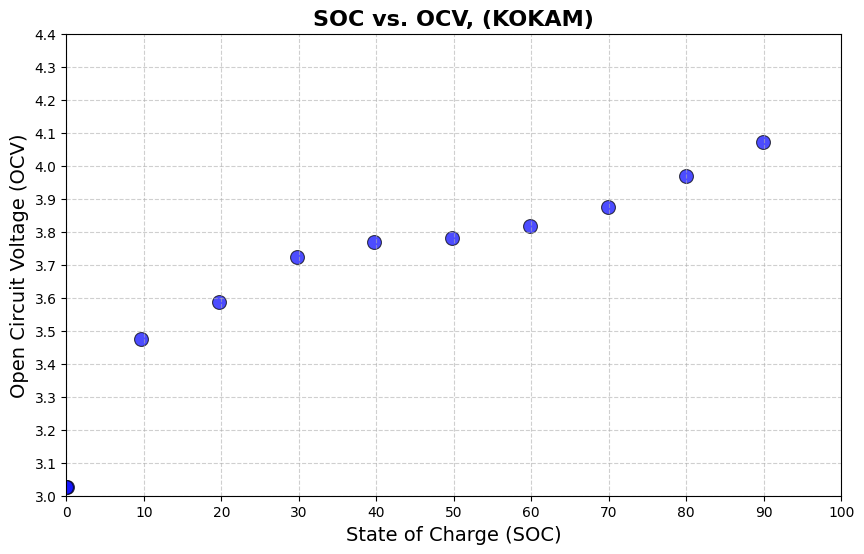

In [77]:
# 1. SOC Vs. OCV plot

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a scatter plot for SOC vs. OCV
sns.scatterplot(x='SOC', y='OCV', data=result_df, s=100, color='b', edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('SOC vs. OCV, (KOKAM)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)', fontsize=14)
plt.ylabel('Open Circuit Voltage (OCV)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
plt.yticks([y / 10 for y in range(30, 45)])  # Y-axis ticks from 3 to 4.4 with a step of 0.1
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100
plt.ylim(3, 4.4)  # Set y-axis limit from 3 to 4.4

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

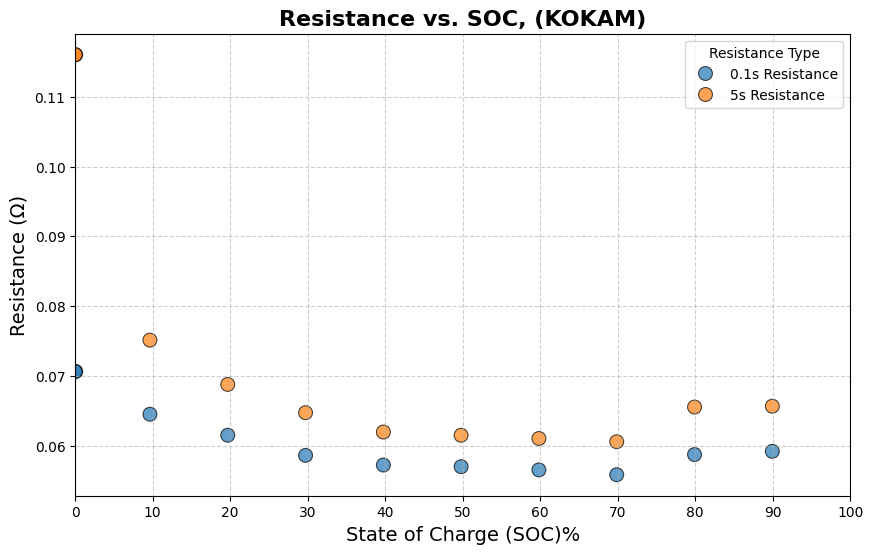

In [78]:
# 2. Resistance @ 0.1s and 5s Vs. SOC


# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long-form for plotting multiple 'y' variables
df_melted_2 = result_df.melt(id_vars='SOC', value_vars=['0.1s Resistance', '5s Resistance'], var_name='Resistance Type', value_name='Resistance')

# Create a scatter plot for SOC vs. Resistances
sns.scatterplot(x='SOC', y='Resistance', hue='Resistance Type', data=df_melted_2, s=100, edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('Resistance vs. SOC, (KOKAM)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)%', fontsize=14)
plt.ylabel('Resistance (Ω)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
# Adjust y-axis ticks and limits based on your data

plt.xlim(0, 100)  # Set x-axis limit from 0 to 100

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

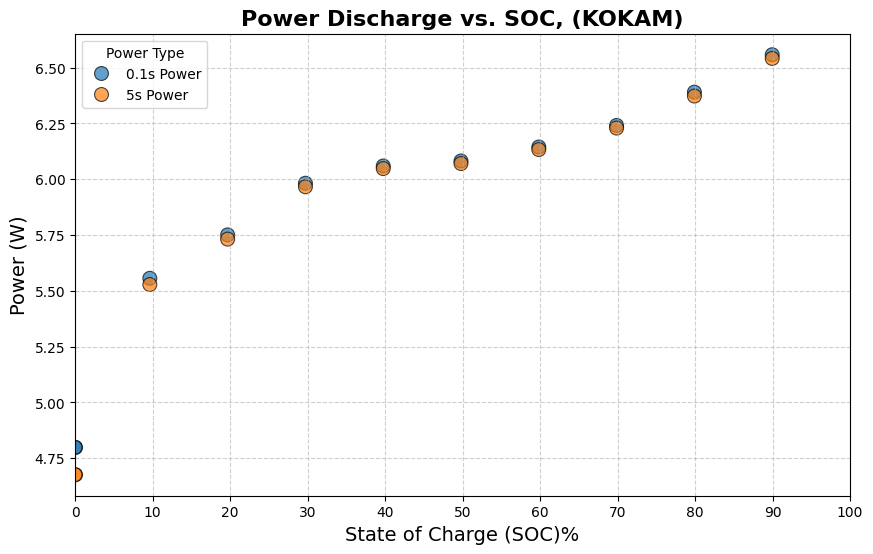

In [79]:
# 3. Power @ 0.1s and 5s Vs. SOC

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long-form for plotting multiple 'y' variables
df_melted_2 = result_df.melt(id_vars='SOC', value_vars=['0.1s Power', '5s Power'], var_name='Power Type', value_name='Power')

# Create a scatter plot for SOC vs. Resistances
sns.scatterplot(x='SOC', y='Power', hue='Power Type', data=df_melted_2, s=100, edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('Power Discharge vs. SOC, (KOKAM)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)%', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
# Adjust y-axis ticks and limits based on your data

plt.xlim(0, 100)  # Set x-axis limit from 0 to 100

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

# LG Chem INR21700 M5018.20

| Item | Condition / Note | Specification |
|---|---|---|
| 2.1 Energy | Std. charge / discharge | Nominal 18.20Wh, Minimum 17.60Wh |
| 2.2 Nominal Voltage | Average | 3.63V |
| 2.3 Nominal Shipping SOC | | 30% |
| 2.4 Standard Charge (Refer to 4.2.1) | Constant current | 0.3C (1,455mA) |
| | Constant voltage | 4.2V |
| | End current(Cut off) | 50mA |
| 2.5 Max. Charge Voltage | | 4.20 ± 0.05V |
| 2.6 Max. Charge Current | 0-25 °C | 0.3C (1,455mA) |
| | 25-50 °C | 0.7C (3,395mA) |
| 2.7 Standard Discharge (Refer to 4.2.2) | Constant current | 0.2C (970mA) |
| | End voltage(Cut off) | 2.50V |
| 2.8 Max. Pulse Discharge Power | Pulse Power(10sec), 25°C ± 2°C | ≤ 80W (SOC 80%) |
| 2.9 Max. Discharge Current | -30--20°C | 0.2C(970mA) |
| | -20-50 | 0.3C(1.455mA) |
| | 5-45 C | 1.5C(7,275mA) |
| | 45-60 C | 1.5C(7,275mA) |
| 2.10 Weight | Without washer | 68.0 ± 1.0 g |
| 2.11 Storage Temperature (for shipping state) | 1 day | -40 °C |
| | 1 month | -20-60 °C |
| | 3 months | -20-45 °C |
| | 1 year | -20-20 °C |

In [80]:
df2 = pd.read_excel('/content/sample_data/LG_OCV.xlsx')
df2.head()

,Time[h],t-Step[h],time(sec),Command,U[V],I[A],Ah[Ah]
0,1.547384,1.666667e-01,599.999999,Pause,4.177193,0.000000,2.426443
1,1.547477,0.000000e+00,0.000000,Discharge,4.177193,0.000179,2.426443
2,1.547477,2.777359e-07,0.001000,Discharge,4.121487,-2.358858,2.426442
3,1.547483,6.942000e-06,0.024991,Discharge,4.111567,-2.420367,2.426426
4,1.547504,2.777754e-05,0.099999,Discharge,4.109659,-2.419989,2.426376


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time[h]    1256 non-null   float64
 1   t-Step[h]  1256 non-null   float64
 2   time(sec)  1256 non-null   float64
 3   Command    1256 non-null   object 
 4   U[V]       1256 non-null   float64
 5   I[A]       1256 non-null   float64
 6   Ah[Ah]     1256 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.8+ KB


In [82]:
df2['Command'].value_counts()

,count
Command,
Discharge,851
Pause,261
Charge,144


In [83]:
df2.drop(columns=['time(sec)'], inplace=True)

In [84]:
df2['Time(s)'] = (df2['t-Step[h]'] * 3600).round(2)
df2.drop(columns=['t-Step[h]'], inplace=True)
df2.head()

,Time[h],Command,U[V],I[A],Ah[Ah],Time(s)
0,1.547384,Pause,4.177193,0.000000,2.426443,600.00
1,1.547477,Discharge,4.177193,0.000179,2.426443,0.00
2,1.547477,Discharge,4.121487,-2.358858,2.426442,0.00
3,1.547483,Discharge,4.111567,-2.420367,2.426426,0.02
4,1.547504,Discharge,4.109659,-2.419989,2.426376,0.10


In [85]:
df2_processed = process_battery_data(df2)
df2_processed.head()

,Time[h],Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
0,1.547384,Pause,4.177193,0.000000,2.426443,600.00,4.525210,100.0,0.00,inf
1,1.547477,Discharge,4.177193,0.000179,2.426443,0.00,4.525210,100.0,0.00,23297.18
2,1.547477,Discharge,4.121487,-2.358858,2.426442,0.00,4.525209,100.0,9.72,1.75
3,1.547483,Discharge,4.111567,-2.420367,2.426426,0.02,4.525193,100.0,9.95,1.70
4,1.547504,Discharge,4.109659,-2.419989,2.426376,0.10,4.525143,100.0,9.95,1.70


In [86]:
df_2_time0point1 = df2[df2['Time(s)'] == 0.1]
df_2_time0point1


,Time[h],Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
4,1.547504,Discharge,4.109659,-2.419989,2.426376,0.1,4.525143,100.00,9.95,1.70
106,1.914295,Discharge,4.022475,-2.420028,1.942371,0.1,4.041138,89.30,9.73,1.66
208,2.281086,Discharge,3.943876,-2.419989,1.458366,0.1,3.557133,78.61,9.54,1.63
310,2.647877,Discharge,3.827313,-2.420009,0.974361,0.1,3.073128,67.91,9.26,1.58
411,3.014669,Discharge,3.730591,-2.420048,0.490357,0.1,2.589123,57.22,9.03,1.54
513,3.381460,Discharge,3.628145,-2.420048,0.006352,0.1,2.105119,46.52,8.78,1.50
615,3.748252,Discharge,3.552598,-2.419989,-0.477653,0.1,1.621114,35.82,8.60,1.47
717,4.115044,Discharge,3.449771,-2.420068,-0.961658,0.1,1.137109,25.13,8.35,1.43
818,4.481835,Discharge,3.348088,-2.419989,-1.445662,0.1,0.653105,14.43,8.10,1.38
924,4.848596,Discharge,3.035218,-2.420028,-1.929667,0.1,0.169100,3.74,7.35,1.25


In [87]:
df2_time5s = df2[df2['Time(s)'] == 5]
df2_time5s

,Time[h],Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
53,1.548865,Discharge,4.096114,-2.420009,2.423082,5.0,4.521849,99.93,9.91,1.69
155,1.915656,Discharge,4.010075,-2.420000,1.939077,5.0,4.037844,89.23,9.70,1.66
257,2.282447,Discharge,3.929759,-2.420027,1.455072,5.0,3.553839,78.53,9.51,1.62
359,2.649238,Discharge,3.816248,-2.420009,0.971068,5.0,3.069834,67.84,9.24,1.58
460,3.016030,Discharge,3.720479,-2.420018,0.487063,5.0,2.585830,57.14,9.00,1.54
562,3.382821,Discharge,3.617843,-2.420044,0.003058,5.0,2.101825,46.45,8.76,1.49
664,3.749613,Discharge,3.542869,-2.420000,-0.480947,5.0,1.617820,35.75,8.57,1.46
766,4.116405,Discharge,3.440232,-2.420009,-0.964952,5.0,1.133815,25.06,8.33,1.42
867,4.483196,Discharge,3.334352,-2.420000,-1.448956,5.0,0.649811,14.36,8.07,1.38
973,4.849957,Discharge,3.007365,-2.420018,-1.932961,5.0,0.165806,3.66,7.28,1.24


In [88]:
df2_OCV = df2[(df2['Time(s)']==570) & (df2['Command'] == 'Pause')]
df2_OCV

,Time[h],Command,U[V],I[A],Ah[Ah],Time(s),capacity_range,SOC,Power,Resistance
102,1.905842,Pause,4.085431,0.0,1.942438,570.0,4.041205,89.30,0.0,inf
204,2.272633,Pause,4.005115,0.0,1.458434,570.0,3.557200,78.61,0.0,inf
306,2.639423,Pause,3.887979,0.0,0.974429,570.0,3.073196,67.91,0.0,inf
407,3.006214,Pause,3.791829,0.0,0.490424,570.0,2.589191,57.22,0.0,inf
509,3.373006,Pause,3.689574,0.0,0.006419,570.0,2.105186,46.52,0.0,inf
611,3.739798,Pause,3.613837,0.0,-0.477586,570.0,1.621181,35.83,0.0,inf
713,4.106589,Pause,3.511772,0.0,-0.961591,570.0,1.137176,25.13,0.0,inf
814,4.473381,Pause,3.412188,0.0,-1.445595,570.0,0.653172,14.43,0.0,inf
919,4.840172,Pause,3.107140,0.0,-1.929600,570.0,0.169167,3.74,0.0,inf
1033,5.075447,Pause,2.853601,0.0,-2.095406,570.0,0.003361,0.07,0.0,inf


In [89]:
result_df2 = create_aggregated_dataframe(df_2_time0point1, df2_time5s, df2_OCV)
result_df2

,SOC,OCV,VDrop1,C1,0.1s Resistance,0.1s Power,VDrop2,C2,5s Resistance,5s Power
0,89.30,4.085431,4.022475,2.420028,0.026014,9.734504,4.010075,2.420000,0.031139,9.704379
1,78.61,4.005115,3.943876,2.419989,0.025305,9.544135,3.929759,2.420027,0.031138,9.510121
2,67.91,3.887979,3.827313,2.420009,0.025069,9.262130,3.816248,2.420009,0.029641,9.235353
3,57.22,3.791829,3.730591,2.420048,0.025305,9.028210,3.720479,2.420018,0.029483,9.003626
4,46.52,3.689574,3.628145,2.420048,0.025384,8.780286,3.617843,2.420044,0.029640,8.755341
5,35.83,3.613837,3.552598,2.419989,0.025305,8.597247,3.542869,2.420000,0.029326,8.573741
6,25.13,3.511772,3.449771,2.420068,0.025620,8.348681,3.440232,2.420009,0.029562,8.325391
7,14.43,3.412188,3.348088,2.419989,0.026488,8.102335,3.334352,2.420000,0.032164,8.069131
8,3.74,3.107140,3.035218,2.420028,0.029719,7.345315,3.007365,2.420018,0.041229,7.277877
9,0.07,2.853601,2.775765,2.420108,0.032162,6.717653,2.712619,2.420009,0.058257,6.564561


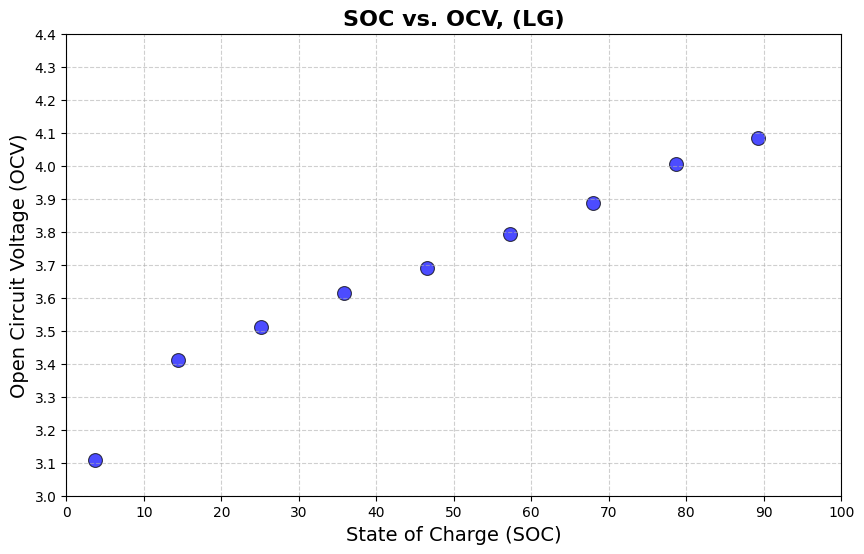

In [90]:
# 1. SOC Vs. OCV plot

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a scatter plot for SOC vs. OCV
sns.scatterplot(x='SOC', y='OCV', data=result_df2, s=100, color='b', edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('SOC vs. OCV, (LG)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)', fontsize=14)
plt.ylabel('Open Circuit Voltage (OCV)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
plt.yticks([y / 10 for y in range(30, 45)])  # Y-axis ticks from 3 to 4.4 with a step of 0.1
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100
plt.ylim(3, 4.4)  # Set y-axis limit from 3 to 4.4

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

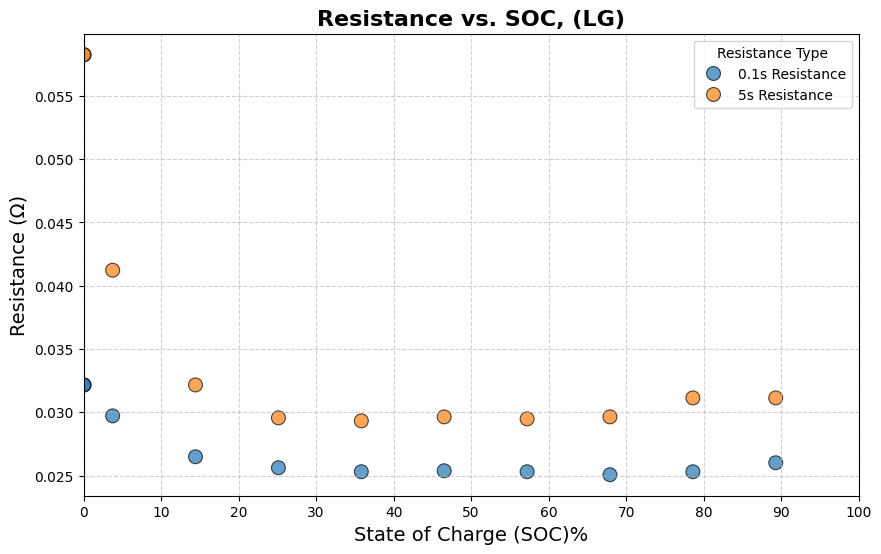

In [91]:
# 2. Resistance @ 0.1s and 5s Vs. SOC


# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long-form for plotting multiple 'y' variables
df_melted_2 = result_df2.melt(id_vars='SOC', value_vars=['0.1s Resistance', '5s Resistance'], var_name='Resistance Type', value_name='Resistance')

# Create a scatter plot for SOC vs. Resistances
sns.scatterplot(x='SOC', y='Resistance', hue='Resistance Type', data=df_melted_2, s=100, edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('Resistance vs. SOC, (LG)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)%', fontsize=14)
plt.ylabel('Resistance (Ω)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
# Adjust y-axis ticks and limits based on your data

plt.xlim(0, 100)  # Set x-axis limit from 0 to 100

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

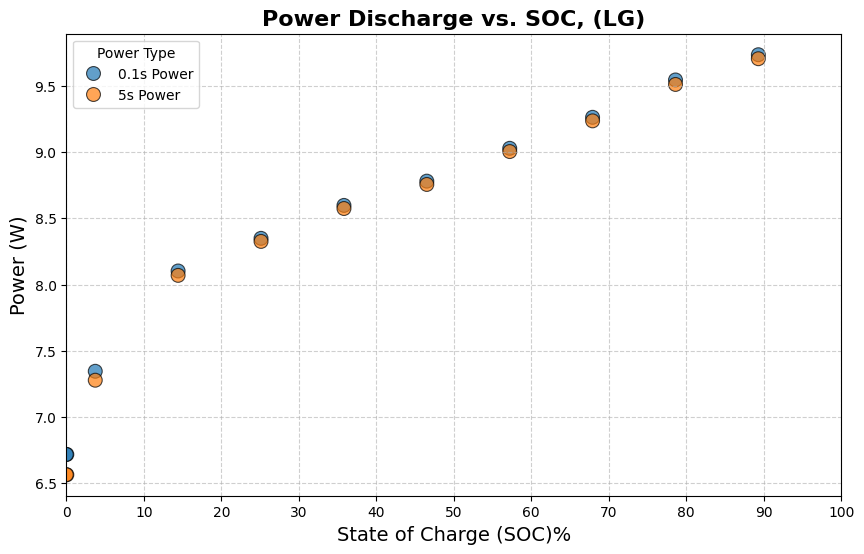

In [92]:
# 3. Power @ 0.1s and 5s Vs. SOC

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long-form for plotting multiple 'y' variables
df_melted_2 = result_df2.melt(id_vars='SOC', value_vars=['0.1s Power', '5s Power'], var_name='Power Type', value_name='Power')

# Create a scatter plot for SOC vs. Resistances
sns.scatterplot(x='SOC', y='Power', hue='Power Type', data=df_melted_2, s=100, edgecolor='k', alpha=0.7)

# Set the title and labels with larger fonts for better readability
plt.title('Power Discharge vs. SOC, (LG)', fontsize=16, fontweight='bold')
plt.xlabel('State of Charge (SOC)%', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Configure x-axis and y-axis ticks and limits
plt.xticks(range(0, 110, 10))  # X-axis ticks from 0 to 100 with a step of 10
# Adjust y-axis ticks and limits based on your data

plt.xlim(0, 100)  # Set x-axis limit from 0 to 100

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

# Result and Discussion

### Results and Discussion

####  SOC vs. OCV
- **KOKAM Battery**: The OCV increases non-linearly with SOC, starting from approximately 3.1V at 10% SOC to about 4.2V at 100% SOC. The curve exhibits a steeper increase at lower SOC levels, indicating a faster voltage rise as the battery charges from a low state.

- **LG Battery**: Similarly, the OCV for the LG battery increases from around 3.1V at 10% SOC to about 4.2V at 100% SOC. However, the relationship between SOC and OCV is more linear compared to the KOKAM battery, suggesting a more predictable voltage response across different SOC levels.

**Conclusion**: Both batteries exhibit an increasing OCV with higher SOC, but the LG battery’s linear relationship indicates a more stable voltage behavior, which can be beneficial for applications requiring precise SOC estimation.

#### Resistance vs. SOC
- **KOKAM Battery**: The internal resistance generally decreases as SOC increases, ranging from approximately 0.07Ω at low SOC to slightly above 0.05Ω at higher SOC. The resistance is measured at two different intervals (0.1s and 5s), with the 5s resistance slightly higher, reflecting a minor increase in resistance over time.

- **LG Battery**: The LG battery shows lower internal resistance across all SOC levels compared to the KOKAM battery, with values ranging from about 0.03Ω to 0.05Ω. Like the KOKAM battery, the resistance decreases as SOC increases, but the LG battery consistently exhibits lower resistance at each SOC level.

**Conclusion**: The lower internal resistance of the LG battery suggests it is more efficient than the KOKAM battery, leading to less energy loss and better performance, especially under high load conditions. The trend of decreasing resistance with increasing SOC is consistent with typical battery behavior, where higher SOC improves conductivity.

####  Power Discharge vs. SOC
- **KOKAM Battery**: The power discharge increases with SOC, starting from approximately 4.75W at low SOC to about 6.5W at high SOC. The difference between the 0.1s and 5s power measurements is minimal, indicating stable power output over short time intervals.

- **LG Battery**: The LG battery demonstrates a higher power discharge compared to the KOKAM battery, with values ranging from around 6.5W at low SOC to about 9.5W at high SOC. Like the KOKAM battery, the power increases with SOC, and the difference between the 0.1s and 5s measurements is also minimal.

**Conclusion**: The LG battery exhibits higher power output across all SOC levels compared to the KOKAM battery, making it more suitable for applications requiring higher power. The minimal difference between the 0.1s and 5s power measurements suggests that both batteries maintain stable power output, even under varying conditions.

### Overall Conclusions
The comparative analysis of KOKAM and LG batteries highlights several key differences:

- The **LG battery** exhibits a more linear OCV-SOC relationship, lower internal resistance, and higher power output compared to the KOKAM battery.
- The **KOKAM battery** shows a more pronounced non-linear increase in OCV with SOC and higher internal resistance, which might result in less efficient performance, particularly at lower SOC levels.

These findings suggest that the LG battery may be more suitable for applications requiring high power and efficiency, while the KOKAM battery could be used in scenarios where these factors are less critical. The insights gained from this study are valuable for optimizing battery management systems and improving the overall performance and reliability of battery-powered devices.

### Recommendations
Based on the findings:

- **For High-Power Applications**: The LG battery is recommended due to its superior power output and lower internal resistance.
- **For General Use**: The KOKAM battery may still be viable, especially in less demanding applications where its higher resistance and non-linear OCV curve are not as critical.
